In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm, norm

In [2]:
D = float(input("Enter the total assumed trading days: "))

Enter the total assumed trading days: 252


In [3]:
ap = pd.read_csv("C:/Users/19874/OneDrive/桌面/Apple Price Analysis.csv")
print(ap)

          Date    Open    High     Low   Close  Adj Close      Volume
0     1/2/2024  187.15  188.44  183.89  185.64     184.94  82,488,700
1     1/3/2024  184.22  185.88  183.43  184.25     183.55  58,414,500
2     1/4/2024  182.15  183.09  180.88  181.91     181.22  71,983,600
3     1/5/2024  181.99  182.76  180.17  181.18     180.50  62,303,300
4     1/8/2024  182.09  185.60  181.50  185.56     184.86  59,144,500
..         ...     ...     ...     ...     ...        ...         ...
119  6/24/2024  207.72  212.70  206.59  208.14     207.90  80,727,000
120  6/25/2024  209.15  211.38  208.61  209.07     208.83  56,713,900
121  6/26/2024  211.50  214.86  210.64  213.25     213.00  66,213,200
122  6/27/2024  214.69  215.74  212.35  214.10     213.85  49,772,700
123  6/28/2024  215.77  216.07  210.30  210.62     210.38  82,542,700

[124 rows x 7 columns]


In [4]:
ap['Price_Shifted_By_1_Day'] = ap['Close'].shift(1)
print(ap['Price_Shifted_By_1_Day'])

0         NaN
1      185.64
2      184.25
3      181.91
4      181.18
        ...  
119    207.49
120    208.14
121    209.07
122    213.25
123    214.10
Name: Price_Shifted_By_1_Day, Length: 124, dtype: float64


In [5]:
ap['Return'] = (ap['Close']-ap['Price_Shifted_By_1_Day']) / ap['Price_Shifted_By_1_Day']
print([ap['Return']])

[0           NaN
1     -0.007488
2     -0.012700
3     -0.004013
4      0.024175
         ...   
119    0.003133
120    0.004468
121    0.019993
122    0.003986
123   -0.016254
Name: Return, Length: 124, dtype: float64]


In [6]:
ap['Log_Return'] = np.log(ap['Return'] + 1)
print(ap['Log_Return'])

0           NaN
1     -0.007516
2     -0.012781
3     -0.004021
4      0.023887
         ...   
119    0.003128
120    0.004458
121    0.019796
122    0.003978
123   -0.016388
Name: Log_Return, Length: 124, dtype: float64


In [7]:
Mean_μd_Hat = ap['Log_Return'].mean()
Annual_Growth_Rate = Mean_μd_Hat * D
print(Annual_Growth_Rate)

0.25865084869941357


In [8]:
Daily_SD = ap['Log_Return'].std(ddof=1)
print(Daily_SD)

0.01510788891012235


In [9]:
Annualized_SD = (D**0.5)*Daily_SD
Vol = Annualized_SD
print(Vol)

0.2398303013482464


Enter the current stock price S(t): 210.62
Enter the strike price K: 210.62
Enter the annual risk-free interest rate r: 0.0379
Enter the maturity time T (in years):  0.0873015873
Enter the current time t (in years):  0
Enter the continuous dividend rate δ: 0.0044
Enter the value to compare the stock price against: 210.62
Calculate the probability of the stock price being 'greater' (call ITM) or 'less' (put ITM) than the compared value: greater
Calculate 'call/put', 'mode', 'probability', 'greeks', 'plot', or 'all'?: all


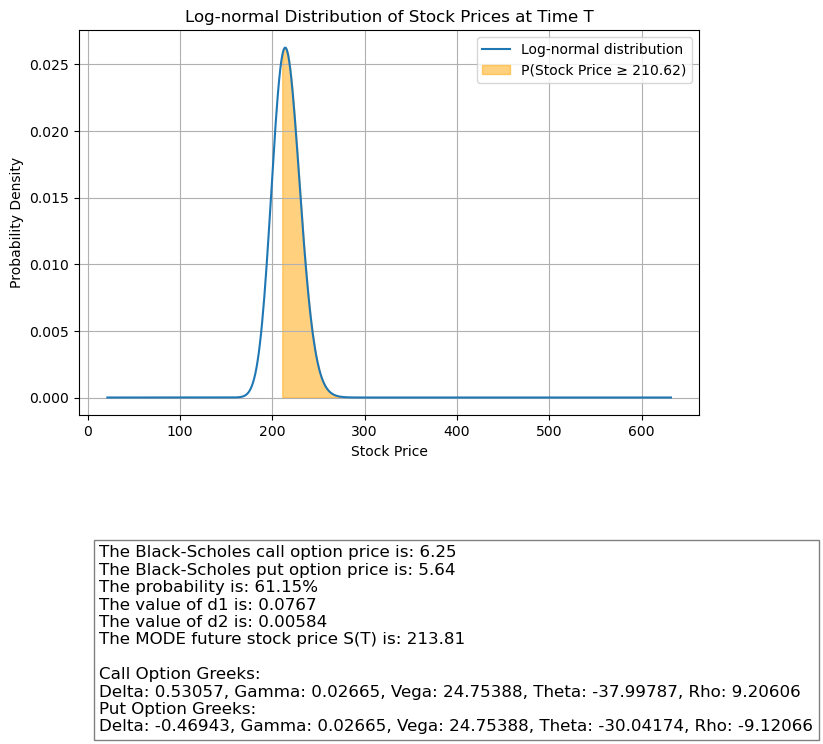

In [19]:
# Goal: Calculate the probability of ATM call option of AAPL with K = 210.62 on June 28, 2024 finishing ITM in 1 month.
# This model is based on the fact that on July 1st, 2024, the U.S. 10-year Treasury yield (r) was approximately 3.79%. 
# The dividend rate (δ) for AAPL as of June 30th, 2024 was approximately 0.44%
# There are 252 trading days (D) in 2024, and there are 22 trading days in July, 2024
import numpy as np
from scipy.stats import lognorm, norm
import matplotlib.pyplot as plt

def mode_price(S, Annual_Growth_Rate, Vol, T, t):
    tau = T - t
    mode_S_T = S * np.exp((Annual_Growth_Rate - (3 / 2) * Vol ** 2) * tau)
    return mode_S_T

def black_scholes_call_with_dividend_and_d_values(S, K, r, Vol, T, t, delta):
    tau = T - t
    d1 = (np.log(S / K) + (r - delta + 0.5 * Vol ** 2) * tau) / (Vol * np.sqrt(tau))
    d2 = d1 - Vol * np.sqrt(tau)
    C = S * np.exp(-delta * tau) * norm.cdf(d1) - K * np.exp(-r * tau) * norm.cdf(d2)
    return C, d1, d2

def black_scholes_put_with_dividend_and_d_values(S, K, r, Vol, T, t, delta):
    tau = T - t
    d1 = (np.log(S / K) + (r - delta + 0.5 * Vol ** 2) * tau) / (Vol * np.sqrt(tau))
    d2 = d1 - Vol * np.sqrt(tau)
    P = K * np.exp(-r * tau) * norm.cdf(-d2) - S * np.exp(-delta * tau) * norm.cdf(-d1)
    return P, d1, d2

def stock_price_probability(S, Vol, Annual_Growth_Rate, T, t, value, direction):
    tau = T - t
    Annual_Growth_Rate_adjusted = np.log(S) + (Annual_Growth_Rate - (1 / 2) * Vol ** 2) * tau
    Vol_adjusted = Vol * np.sqrt(tau)

    dist = lognorm(s=Vol_adjusted, scale=np.exp(Annual_Growth_Rate_adjusted))
    if direction == 'greater':
        return 1 - dist.cdf(value)
    elif direction == 'less':
        return dist.cdf(value)
    else:
        raise ValueError("The direction parameter should be 'greater' or 'less'.")

def plot_lognormal_distribution(S, Vol, Annual_Growth_Rate, T, t, value, direction, results):
    tau = T - t
    Annual_Growth_Rate_adjusted = np.log(S) + (Annual_Growth_Rate - (1 / 2) * Vol ** 2) * tau
    Vol_adjusted = Vol * np.sqrt(tau)

    dist = lognorm(s=Vol_adjusted, scale=np.exp(Annual_Growth_Rate_adjusted))

    plt.figure(figsize=(8, 5))

    x = np.linspace(0.1 * S, 3 * S, 500)
    pdf_values = dist.pdf(x)

    plt.plot(x, pdf_values, label='Log-normal distribution')
    plt.title('Log-normal Distribution of Stock Prices at Time T')
    plt.xlabel('Stock Price')
    plt.ylabel('Probability Density')
    plt.grid(True)

    if direction == 'greater':
        x_fill = np.linspace(value, x[-1], 500)
        plt.fill_between(x_fill, dist.pdf(x_fill), color='orange', alpha=0.5,
                         label=f'P(Stock Price ≥ {round(value,2)})')
    elif direction == 'less':
        x_fill = np.linspace(x[0], value, 500)
        plt.fill_between(x_fill, dist.pdf(x_fill), color='orange', alpha=0.5,
                         label=f'P(Stock Price ≤ {round(value,2)})')

    plt.legend()

    plt.figtext(0.15, -0.15, results, fontsize=12, va="top", ha="left", bbox=dict(facecolor='white', alpha=0.5))

    plt.show()


def format_results(call_price, put_price, prob, d1, d2, mode_price_val, greeks):
    call_price = round(call_price, 2)
    put_price = round(put_price, 2)
    prob = round(prob * 100, 2)
    d1 = round(d1, 5)
    d2 = round(d2, 5)
    mode_price_val = round(mode_price_val, 2)

    delta_call, gamma_call, vega_call, theta_call, rho_call, delta_put, gamma_put, vega_put, theta_put, rho_put = greeks

    delta_call = round(delta_call, 5)
    gamma_call = round(gamma_call, 5)
    vega_call = round(vega_call, 5)
    theta_call = round(theta_call, 5)
    rho_call = round(rho_call, 5)
    
    delta_put = round(delta_put, 5)
    gamma_put = round(gamma_put, 5)
    vega_put = round(vega_put, 5)
    theta_put = round(theta_put, 5)
    rho_put = round(rho_put, 5)

    results = (
        f"The Black-Scholes call option price is: {call_price}\n"
        f"The Black-Scholes put option price is: {put_price}\n"
        f"The probability is: {prob}%\n"
        f"The value of d1 is: {d1}\n"
        f"The value of d2 is: {d2}\n"
        f"The MODE future stock price S(T) is: {mode_price_val}\n\n"
        f"Call Option Greeks:\n"
        f"Delta: {delta_call}, Gamma: {gamma_call}, Vega: {vega_call}, Theta: {theta_call}, Rho: {rho_call}\n"
        f"Put Option Greeks:\n"
        f"Delta: {delta_put}, Gamma: {gamma_put}, Vega: {vega_put}, Theta: {theta_put}, Rho: {rho_put}"
    )
    return results

def calculate_greeks(S, K, r, Vol, T, t, d1, d2):
    tau = T - t
    n_d1 = norm.pdf(d1)
    n_d2 = norm.pdf(d2)

    delta_call = norm.cdf(d1)
    gamma_call = n_d1 / (S * Vol * np.sqrt(tau))
    vega_call = S * n_d1 * np.sqrt(tau)
    theta_call = (-S * n_d1 * Vol / (2 * np.sqrt(tau)) - r * K * np.exp(-r * tau) * norm.cdf(d2))
    rho_call = K * tau * np.exp(-r * tau) * norm.cdf(d2)

    delta_put = norm.cdf(d1) - 1
    gamma_put = gamma_call
    vega_put = vega_call
    theta_put = (-S * n_d1 * Vol / (2 * np.sqrt(tau)) + r * K * np.exp(-r * tau) * norm.cdf(-d2))
    rho_put = -K * tau * np.exp(-r * tau) * norm.cdf(-d2)

    return delta_call, gamma_call, vega_call, theta_call, rho_call, delta_put, gamma_put, vega_put, theta_put, rho_put

def financial_calculations_input():
    S = float(input("Enter the current stock price S(t): "))
    K = float(input("Enter the strike price K: "))
    r = float(input("Enter the annual risk-free interest rate r: "))
    T = float(input("Enter the maturity time T (in years):  "))
    t = float(input("Enter the current time t (in years):  "))
    delta = float(input("Enter the continuous dividend rate δ: "))
    value = float(input("Enter the value to compare the stock price against: "))
    direction = input("Calculate the probability of the stock price being 'greater' (call ITM) or 'less' (put ITM) than the compared value: ").lower()
    calc_type = input("Calculate 'call/put', 'mode', 'probability', 'greeks', 'plot', or 'all'?: ").lower()

    tau = T - t
    d1 = (np.log(S / K) + (r - delta + 0.5 * Vol ** 2) * tau) / (Vol * np.sqrt(tau))
    d2 = d1 - Vol * np.sqrt(tau)

    call_price, d1, d2 = black_scholes_call_with_dividend_and_d_values(S, K, r, Vol, T, t, delta)
    put_price, _, _ = black_scholes_put_with_dividend_and_d_values(S, K, r, Vol, T, t, delta)

    mode_price_val = mode_price(S, Annual_Growth_Rate, Vol, T, t)

    prob = stock_price_probability(S, Vol, Annual_Growth_Rate, T, t, value, direction)

    greeks = calculate_greeks(S, K, r, Vol, T, t, d1, d2)

    results = format_results(call_price, put_price, prob, d1, d2, mode_price_val, greeks)

    if calc_type in ['plot', 'all']:
        plot_lognormal_distribution(S, Vol, Annual_Growth_Rate, T, t, value, direction, results)

financial_calculations_input()
